# Introduction
PGP AIML Postgraduate Program Project No. 4

## Project Information

### Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

### Data Provided
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
#### Input Variable(s)
1. Cement (cement) -- quantitative -- kg in a m3 mixture
2. Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture
3. Fly Ash (ash) -- quantitative -- kg in a m3 mixture
4. Water (water) -- quantitative -- kg in a m3 mixture
5. Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture
6. Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture
7. Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture
8. Age (age) -- quantitative -- Day (1~365)

#### Output Variable(s) / Target(s): 
9. Concrete compressive strength(strength) -- quantitative -- MPa

## Notebook Summary

# Imports
Import libraries and write settings here.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pydotplus as pydot
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from scipy.stats import randint as sp_randint
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix #-----model validation scores
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step

from yellowbrick.classifier import ClassificationReport, ROCAUC

import missingno as msno_plot #--------------plotting missing values
from os import system

from IPython.display import display #---------------------for displaying multiple data frames in one output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.4f}'.format

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import clear_output

# 1. Get the Data

In [2]:
data = "concrete.csv"

In [3]:
df = pd.read_csv(data)

# 2. Discover & Visualize the Data


## 2.1 General Data Information
<b> Tasks Executed in this section </b>
1. Shape
2. Column Names (Attributes)
3. Info (Counts / Types)
4. Missing Values
5. Unique Values
6. Duplicate Records
7. Head & Tail (first 5 / last 5 rows of data)

### Shape

In [4]:
print(df.shape)

(1030, 9)


### Column Names (attributes)

In [5]:
print(df.columns)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


### Info (Counts / Types)

In [6]:
print(df.info())
print()
print(df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None

9270


### Deduplicate Records

In [7]:
dupes = df.duplicated()
sum(dupes)

25

In [8]:
print(df.info())
df=df.drop_duplicates()
print()
print(df.info())
dupes = df.duplicated()
print()
sum(dupes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64


0

### Missing Values

In [9]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

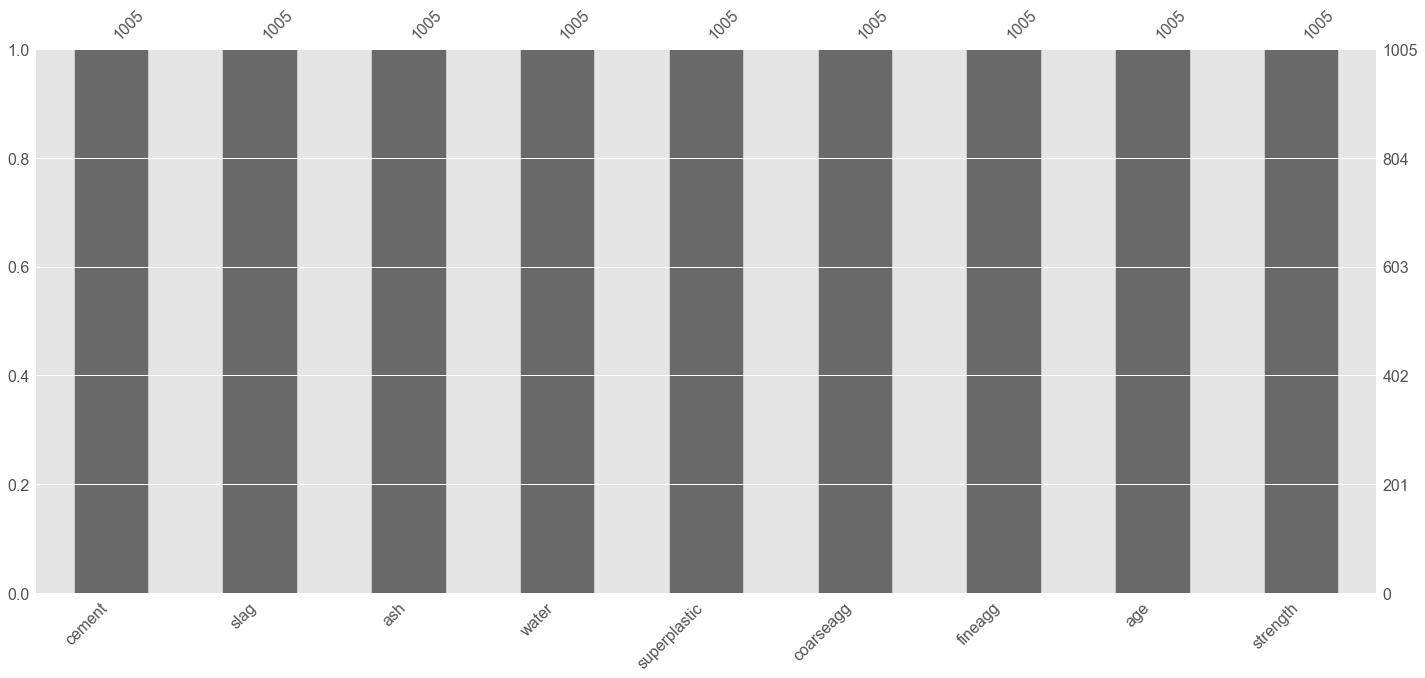

In [10]:
msno_plot.bar(df);

### Unique Values

In [11]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

### Head & Tail (first 5 / last 5 rows of data)

In [12]:
pd.concat([df.head(5),df.tail(5)])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000,212.0000,0.0000,203.5000,0.0000,971.8000,748.5000,28,29.8900
1,168.9000,42.2000,124.3000,158.3000,10.8000,"1,080.8000",796.2000,14,23.5100
2,250.0000,0.0000,95.7000,187.4000,5.5000,956.9000,861.2000,28,29.2200
3,266.0000,114.0000,0.0000,228.0000,0.0000,932.0000,670.0000,28,45.8500
4,154.8000,183.4000,0.0000,193.3000,9.1000,"1,047.4000",696.7000,28,18.2900
1025,135.0000,0.0000,166.0000,180.0000,10.0000,961.0000,805.0000,28,13.2900
1026,531.3000,0.0000,0.0000,141.8000,28.2000,852.1000,893.7000,3,41.3000
1027,276.4000,116.0000,90.3000,179.6000,8.9000,870.1000,768.3000,28,44.2800
1028,342.0000,38.0000,0.0000,228.0000,0.0000,932.0000,670.0000,270,55.0600
1029,540.0000,0.0000,0.0000,173.0000,0.0000,"1,125.0000",613.0000,7,52.6100


### Restructure Dataframe Attributes
<b> Tasks Executed in this section </b>
1. Separate Numeric from Categorical Attributes
2. Reorder Attributes to Place Object Types on "Right of Dataframe"
3. Separate Predictor(s) from Target(s)

<b> Findings </b>
1. All attributes are numeric

<b> Actions </b>
1. Separate Numeric from Categorical Attributes - no action, all numeric attributes
2. Reorder Attributes to Place Object Types on "Right of Dataframe" - no action, all numeric attributes
3. Separate Predictor(s) from Target(s) - xxxx

#### Separate Numeric from Categorical Attributes

In [13]:
num_cols=[]
cat_cols=[]

for i in df.columns:
    if df[i].dtypes!=object:
        num_cols.append(i)
    else:
        cat_cols.append(i)

if len(df.columns) == len(num_cols):
    print("all columns are numeric")
else:
    print("number of numeric columns: ",len(num_cols))
    print("the numeric columns are: ", num_cols)
    print("number of categorical columns: ",len(cat_cols))
    print("the categorical columns are: ", cat_cols)

all columns are numeric


#### Reorder Attributes to Place Object Types on "Right of Dataframe" 

In [14]:
if len(df.columns) == len(num_cols):
    df = df[num_cols]
else:
    df = df[num_cols].append(df[cat_cols])

pd.concat([df.head(5),df.tail(5)])    
#print(df.info())

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000,212.0000,0.0000,203.5000,0.0000,971.8000,748.5000,28,29.8900
1,168.9000,42.2000,124.3000,158.3000,10.8000,"1,080.8000",796.2000,14,23.5100
2,250.0000,0.0000,95.7000,187.4000,5.5000,956.9000,861.2000,28,29.2200
3,266.0000,114.0000,0.0000,228.0000,0.0000,932.0000,670.0000,28,45.8500
4,154.8000,183.4000,0.0000,193.3000,9.1000,"1,047.4000",696.7000,28,18.2900
1025,135.0000,0.0000,166.0000,180.0000,10.0000,961.0000,805.0000,28,13.2900
1026,531.3000,0.0000,0.0000,141.8000,28.2000,852.1000,893.7000,3,41.3000
1027,276.4000,116.0000,90.3000,179.6000,8.9000,870.1000,768.3000,28,44.2800
1028,342.0000,38.0000,0.0000,228.0000,0.0000,932.0000,670.0000,270,55.0600
1029,540.0000,0.0000,0.0000,173.0000,0.0000,"1,125.0000",613.0000,7,52.6100


## 2.2 Univariate & Multivariate Analysis
<b> Tasks Executed in this section </b>
1. Univariate Analysis
2. Multivariate Analysis 

<b> Findings </b>
1. Univariate Analysis
2. Multivariate Analysis 

<b> Actions </b>
None


### Univariate Analysis
<b> Tasks Executed in this section </b>
1. Descriptive Statistics
2. Histograms
3. Boxplots

<b> Findings </b>
1. Descriptive Statistics: 5 attributes are normally distributed / 4 have bimodal distributions
2. Histograms / Boxplots: Data contains outliers

<b> Actions </b>
None

#### Descriptive Statistics

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,005.0000",278.6313,104.3443,102.0000,190.7000,265.0000,349.0000,540.0000
slag,"1,005.0000",72.0435,86.1708,0.0000,0.0000,20.0000,142.5000,359.4000
ash,"1,005.0000",55.5363,64.2080,0.0000,0.0000,0.0000,118.3000,200.1000
water,"1,005.0000",182.0753,21.3393,121.8000,166.6000,185.7000,192.9000,247.0000
superplastic,"1,005.0000",6.0332,5.9200,0.0000,0.0000,6.1000,10.0000,32.2000
coarseagg,"1,005.0000",974.3768,77.5797,801.0000,932.0000,968.0000,"1,031.0000","1,145.0000"
fineagg,"1,005.0000",772.6883,80.3404,594.0000,724.3000,780.0000,822.2000,992.6000
age,"1,005.0000",45.8567,63.7347,1.0000,7.0000,28.0000,56.0000,365.0000
strength,"1,005.0000",35.2504,16.2848,2.3300,23.5200,33.8000,44.8700,82.6000


#### Histograms

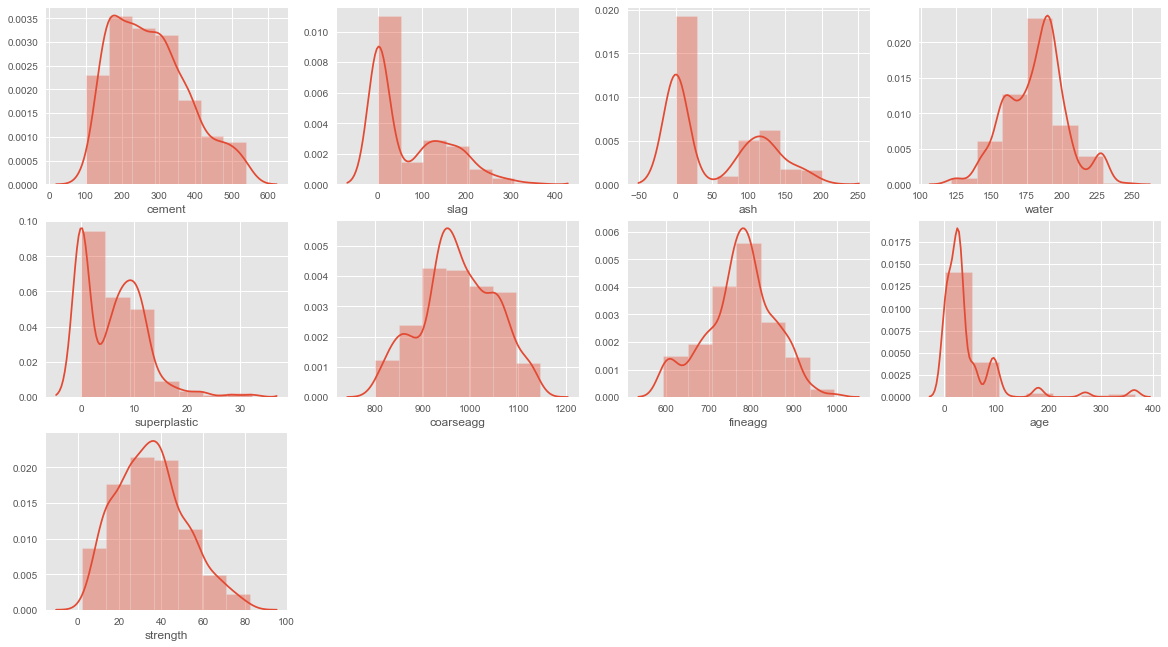

In [16]:
# distributions of numerical (continuous) attributes
col_num = df[num_cols]
bins=7
plt.figure(figsize= (20,15))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
j=1
for i in col_num: 
    plt.subplot(4, 4, pos)
    sns.distplot(df[i], bins=bins)
    pos += 1 

In [17]:
for i in col_num:
    value = df[i].value_counts(normalize=True).sort_index().round(2)
    print("for ", i)
    print(value)
    print()

for  cement
102.0000   0.0000
108.3000   0.0000
116.0000   0.0000
122.6000   0.0000
132.0000   0.0000
            ...  
522.0000   0.0000
525.0000   0.0100
528.0000   0.0000
531.3000   0.0000
540.0000   0.0100
Name: cement, Length: 278, dtype: float64

for  slag
0.0000     0.4700
11.0000    0.0000
13.6000    0.0000
15.0000    0.0000
17.2000    0.0000
            ...  
290.2000   0.0000
305.3000   0.0000
316.1000   0.0000
342.1000   0.0000
359.4000   0.0000
Name: slag, Length: 185, dtype: float64

for  ash
0.0000     0.5400
24.5000    0.0100
59.0000    0.0000
60.0000    0.0000
71.0000    0.0000
            ...  
194.0000   0.0000
194.9000   0.0000
195.0000   0.0000
200.0000   0.0000
200.1000   0.0000
Name: ash, Length: 156, dtype: float64

for  water
121.8000   0.0000
126.6000   0.0000
127.0000   0.0000
127.3000   0.0000
137.8000   0.0000
            ...  
228.0000   0.0500
236.7000   0.0000
237.0000   0.0000
246.9000   0.0000
247.0000   0.0000
Name: water, Length: 195, dtype: float64



<b> Notes </b>
1. cement: more or less evenly spread out
2. slag: most <= 200 of which most are zero
3. ash: high count of "zeroes"
4. water: more or less uniformly distributed
5. superplasatic: most <= 10 of which most are zero
6. courseagg: more or less uniformly distributed
7. fineagg: more or less uniformly distributed
8. age: most <= 100 days
9. strength: more or less uniformly distributed


#### Boxplots

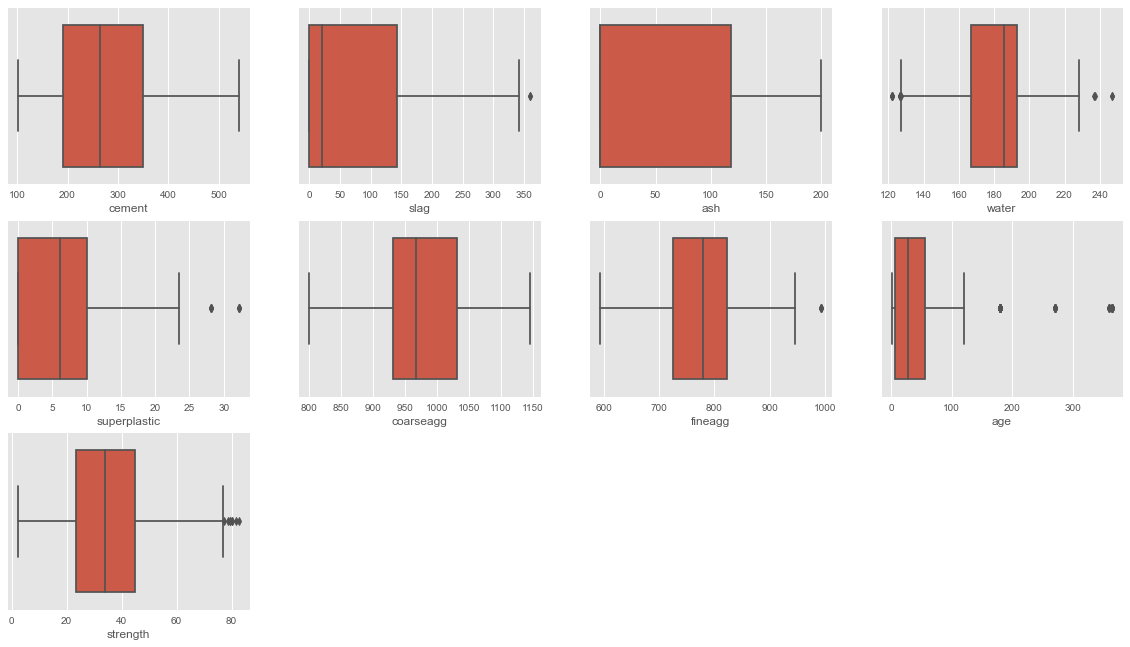

In [18]:
col_num = df[num_cols]
plt.figure(figsize=(20,15))
pos = 1
for i in col_num:
    plt.subplot(4, 4, pos)
    sns.boxplot(df[i])
    pos += 1 

###  Multivariate Analysis
<b> Tasks Executed in this section </b>
1. Predictors
2. Predictor(s) vs Target(s)
3. Collinearity / Correlations

<b> Findings </b>
1. weakest relationships with target among predictors: ash, water, superplastic
2. strongest relationships with target among predictors: age, fineagg, cement, slag


3. strongest negative correlation(s): superplastic/water (-.65)
4. strongest positive correlations(s): superplastic/ash (.41)
5. strongest negative correlation(s) beteen predictors and target: water (-.27)
6. strongest positive correlation(s) beteen predictors and target: cement (.49)


7. Lowest Ranked Feature(s) (Shapiro): age, ash, slag
8. Highest Ranked Feature(s) (Shapiro): cement, water, coarseagg, fineagg
9. Lowest Ranked Feature(s) (Pearson/Covariance): water
10. Highest Ranked Feature(s) (Pearson): superplastic

<b> Actions </b>
1. Correlated features can make coefficients in regression (or feature importance in tree models) unstable or difficult to interpret. There are no strong relationships between attributes in this dataset, therefore no need to remove columns based on relationship strength. 
2. Removing ash and superplastic attributes will be evaluated as they  are among attributes with the weakest relationship to target and have the highest positive correlation. 

In [19]:
# select multiple attributes to view as line graphs
opts = df.columns.values
selector = widgets.SelectMultiple(options=opts, value=[opts[1]], rows=len(opts), description='Variables', disabled=False)

output = widgets.Output()
display(selector)
display(output)

def multiplot(widg):
    choices = widg['new']
    data = df.loc[:, choices] if choices else df
    output.clear_output(wait=True)
    with output:
        ax = data.plot()
        plt.show()            
selector.observe(multiplot, names='value')  

SelectMultiple(description='Variables', index=(1,), options=('cement', 'slag', 'ash', 'water', 'superplastic',…

Output()

<b> On Radial Visualization aka RadViz (chart below) </b>
1. RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle. 
2. It then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. 
2. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization.
3. Data scientists use this method to detect separability between classes. E.g. is there an opportunity to learn from the feature set or is there just too much noise?
4. RadViz allow to project a N-dimensional data set into a 2D space where the influence of each dimension can be interpreted as a balance between the influence of all dimensions.
5. Each Series in the DataFrame is represented as a evenly distributed slice on a circle. 
6. Each data point is rendered in the circle according to the value on each Series. 
7. Highly correlated Series in the DataFrame are placed closer on the unit circle.

From: https://www.scikit-yb.org/en/latest/api/features/radviz , https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz

In [20]:
# select single attribute that will be binned and used to color code points according to correlation to it
from pandas.plotting import radviz
opts2 = df.columns.values
dfrv=df.iloc[:, :-1]
selector2 = widgets.RadioButtons(options=opts2, description='Select Target:', disabled=False)

output2 = widgets.Output()
display(selector2)
display(output2)

def radplot(widg):
    choices = widg['new']
    data = df.loc[:, choices] if choices else df
    output2.clear_output(wait=True)
    with output2:
        fig, ax = plt.subplots(figsize=(13, 6))
        dfrv['target_bins']= pd.cut(df[selector2.value], 11)
        ax = radviz(dfrv, "target_bins", colormap="bwr")
        plt.show()
     
selector2.observe(radplot,names = 'value')  

RadioButtons(description='Select Target:', options=('cement', 'slag', 'ash', 'water', 'superplastic', 'coarsea…

Output()

<b> Notes </b>
1. weakest relationships with target among predictors - ash, water, superplastic
2. strongest relationships with target among predictors - age, fineagg, cement, slag

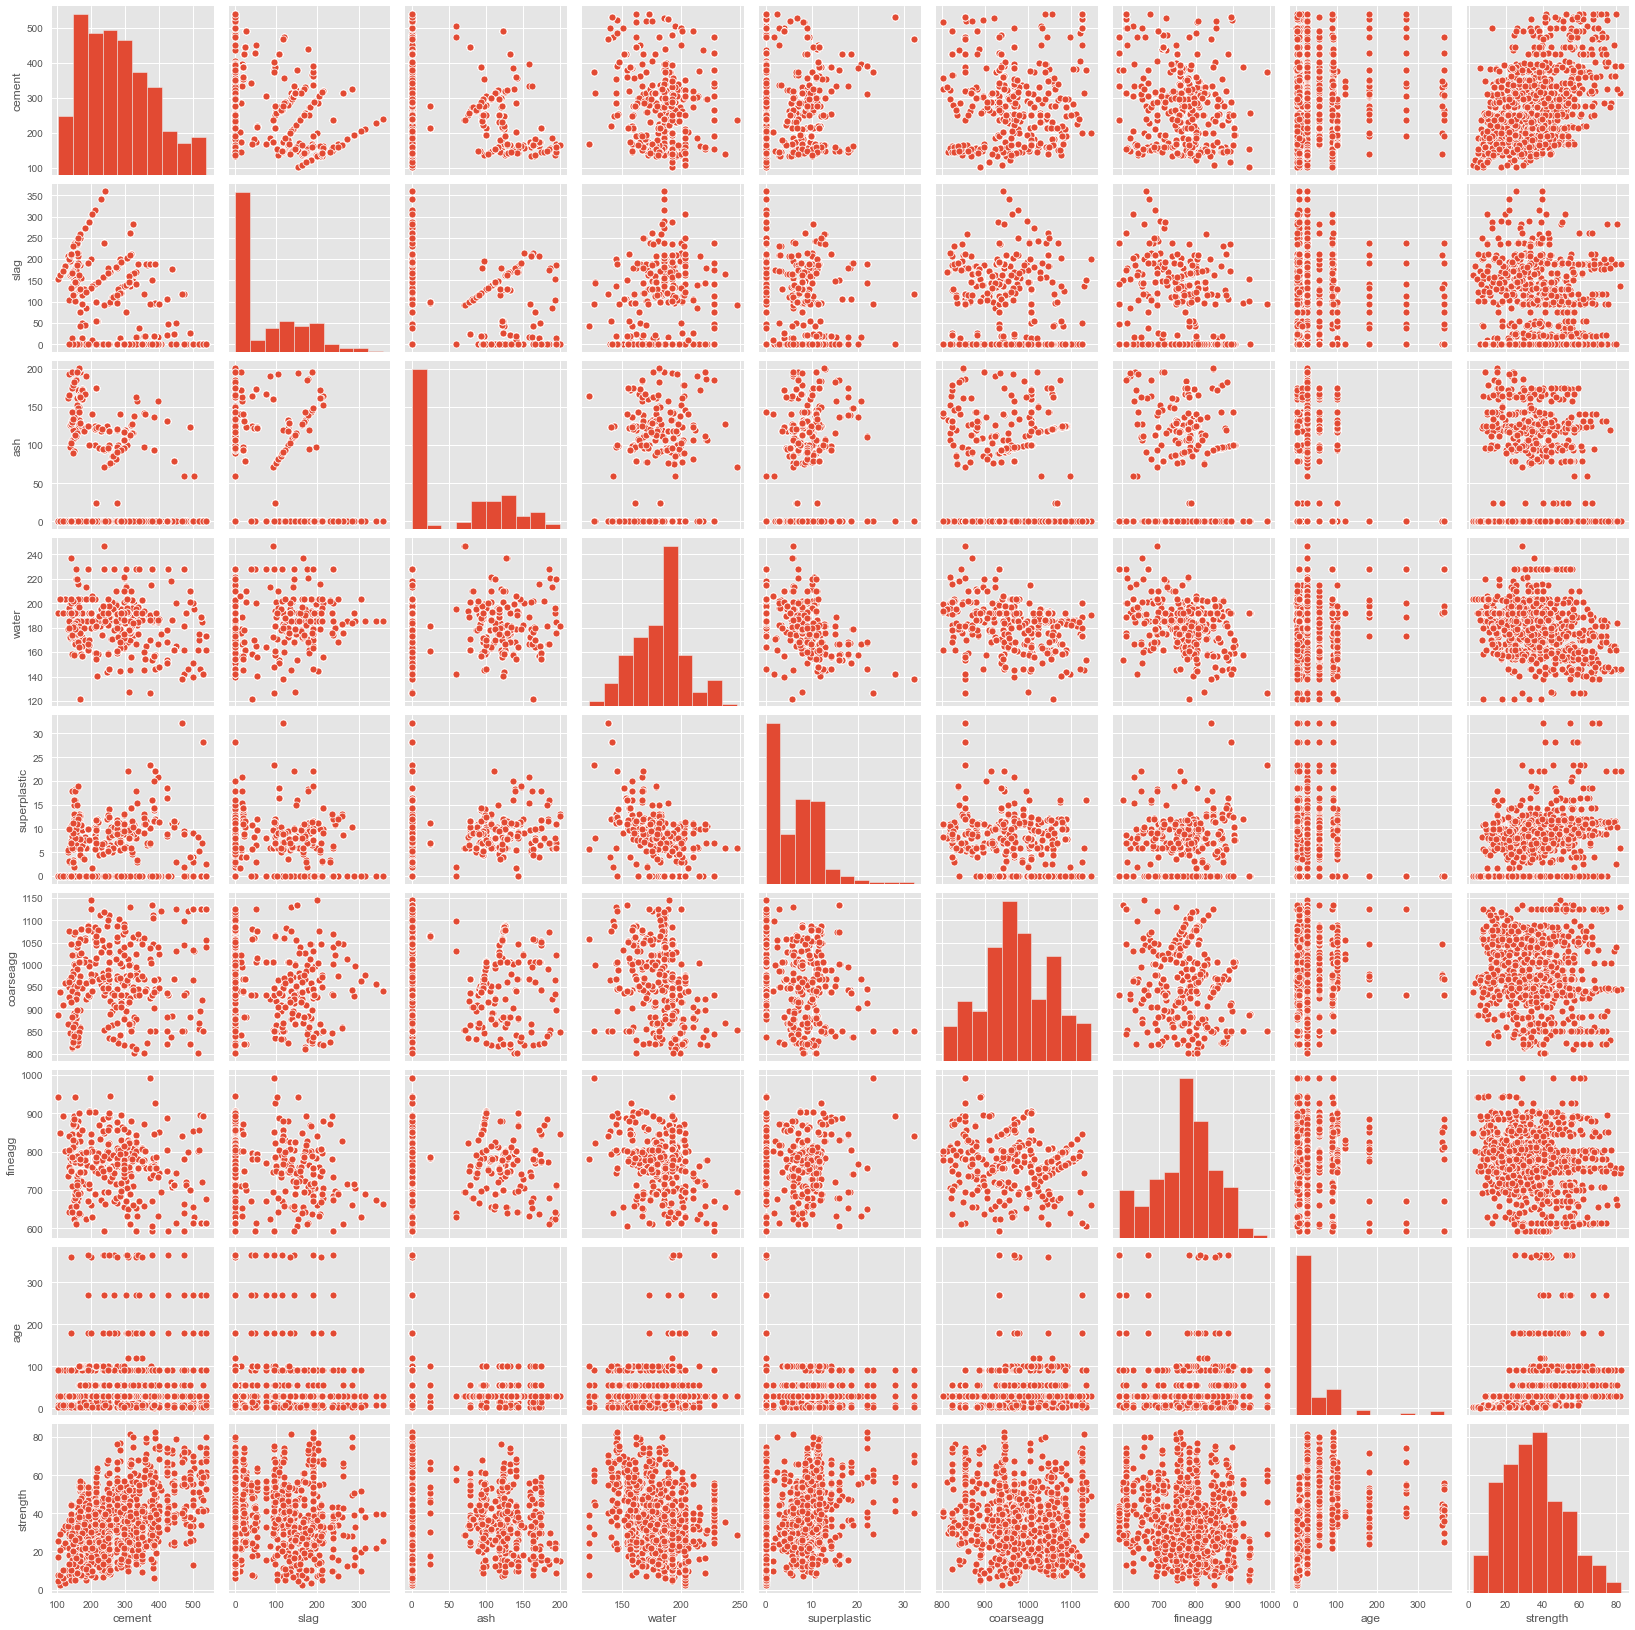

In [21]:
sns.pairplot(df)

In [22]:
# select single attribute that will be binned and used as "Hue" in pairplot 
opts4 = df.columns.values
selector4 = widgets.RadioButtons(options=opts4, description='Select Hue Attribute:', disabled=False)

output4 = widgets.Output()
display(selector4)
display(output4)

def pairplot3(widg):
    choices = widg['new']
    data = df.loc[:, choices] if choices else df
    output4.clear_output(wait=True)
    with output4:
        df['hue_bins']= pd.cut(df[selector4.value], 3)
        ax = sns.pairplot(df, hue = "hue_bins",  palette="husl")
        plt.show()
selector4.observe(pairplot3,names = 'value')

RadioButtons(description='Select Hue Attribute:', options=('cement', 'slag', 'ash', 'water', 'superplastic', '…

Output()

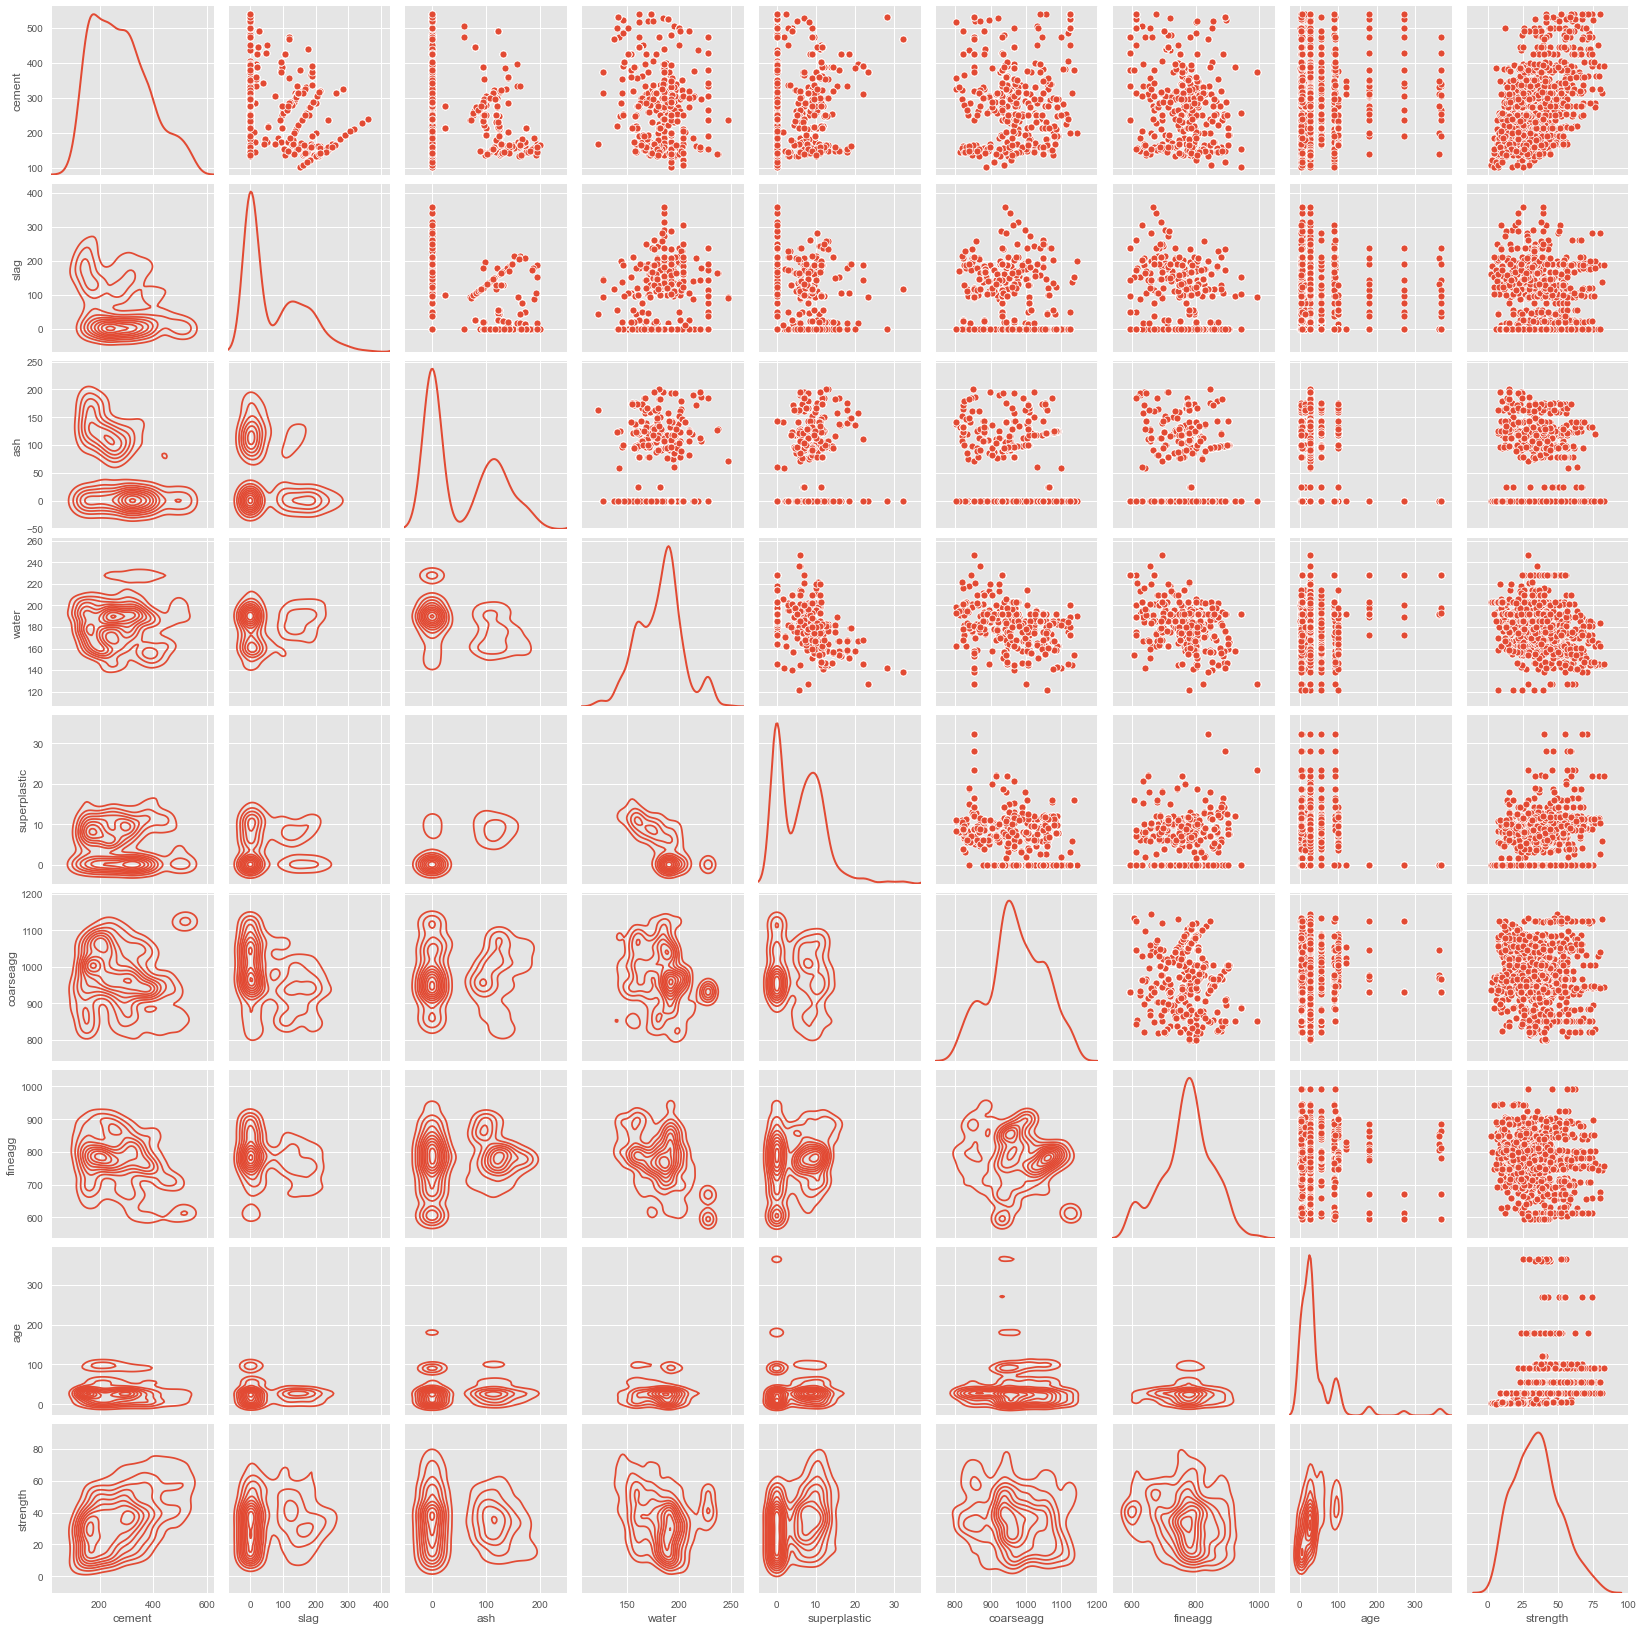

In [23]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot, lw=2)

#### Correlations / Collinearity

In [24]:
df.corr() # It will show correlation of only numerical variables here.

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.0000,-0.3033,-0.3856,-0.0566,0.0609,-0.0862,-0.2454,0.0863,0.4883
slag,-0.3033,1.0000,-0.3124,0.1303,0.0198,-0.2776,-0.2897,-0.0428,0.1034
ash,-0.3856,-0.3124,1.0000,-0.2833,0.4142,-0.0265,0.0903,-0.1589,-0.0806
water,-0.0566,0.1303,-0.2833,1.0000,-0.6469,-0.2125,-0.4449,0.2793,-0.2696
superplastic,0.0609,0.0198,0.4142,-0.6469,1.0000,-0.2417,0.2080,-0.1941,0.3442
coarseagg,-0.0862,-0.2776,-0.0265,-0.2125,-0.2417,1.0000,-0.1622,-0.0053,-0.1447
fineagg,-0.2454,-0.2897,0.0903,-0.4449,0.2080,-0.1622,1.0000,-0.1566,-0.1864
age,0.0863,-0.0428,-0.1589,0.2793,-0.1941,-0.0053,-0.1566,1.0000,0.3374
strength,0.4883,0.1034,-0.0806,-0.2696,0.3442,-0.1447,-0.1864,0.3374,1.0000


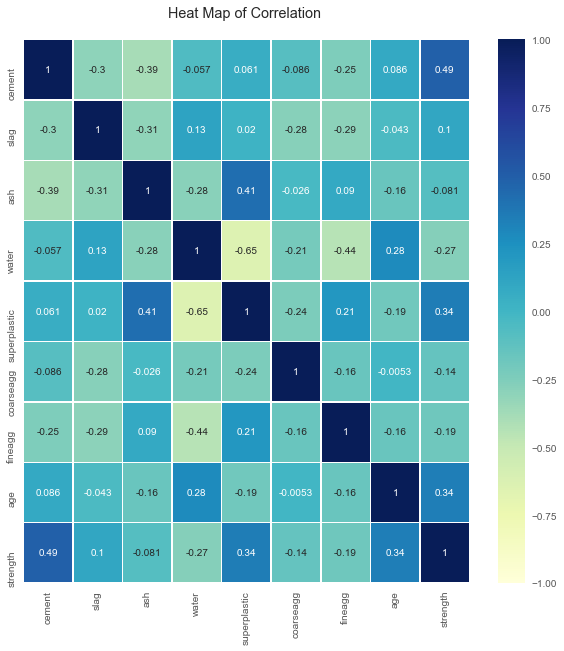

In [25]:
corr = df.corr();
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.title('Heat Map of Correlation \n')
sns.heatmap(corr,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

<b> Notes </b>
1. strongest negative correlation(s):superplastic/water (-.65)
2. strongest positive correlations(s): superplastic/ash (.41)
3. strongest negative correlation(s) beteen predictors and target: water (-.27)
4. strongest positive correlation(s) beteen predictors and target: cement (.49)

<b> On Correlation Heatmap (chart below) </b>
1. Display the feature spearman's correlation matrix as a heatmap with any abs(value)>color_threshold appearing with background color.
2.  Spearman's correlation is the same thing as converting two variables to rank values and then running a standard Pearson's correlation on those ranked variables. 
3. Spearman's is nonparametric and does not assume a linear relationship between the variables; it looks for
    monotonic relationships.
4. Because it is a symmetric matrix, only the upper triangle is shown. The diagonal is all x's since auto-correlation is not useful.

From: https://github.com/parrt/random-forest-importances/blob/master/src/rfpimp.py, https://explained.ai/rf-importance/

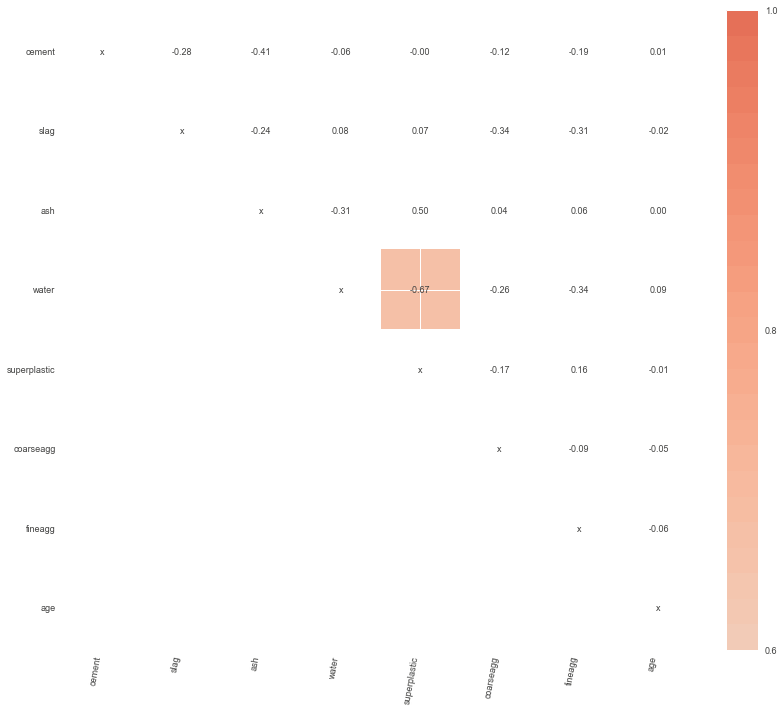

In [26]:
predictors = df.iloc[:, :-1]
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(predictors, figsize=(11,11), label_fontsize=9, value_fontsize=9)

<b> Notes </b>
1. strongest spearman correlation with target: age (.61)
2. weakest spearman correlation with target: 

<b> On Shapiro-Wilks, Covarience, and Pearson's Ranking Algorithms used in charts below </b>
1. A one-dimensional ranking of features utilizes a ranking algorithm that takes into account only a single feature at a time (e.g. histogram analysis).
2. Shapiro-Wilk algorithm to assess the normality of the distribution of instances with respect to the feature. 
3. A barplot is then drawn showing the relative ranks of each feature.
4. A two-dimensional ranking of features utilizes a ranking algorithm that takes into account pairs of features at a time (e.g. joint plot analysis). 
5. The pairs of features are then ranked by score and visualized using the lower left triangle of a feature co-occurence matrix
6. The covariance ranking algorithm, attempts to compute the mean value of the product of deviations of variates from their respective means. 
7. Covariance loosely attempts to detect a colinear relationship between features.

From: https://www.scikit-yb.org/en/latest/api/features/rankd 

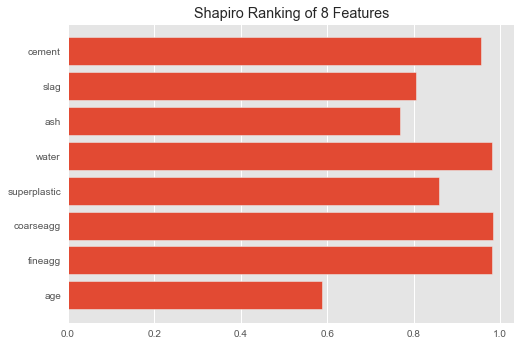

<AxesSubplot:title={'center':'Shapiro Ranking of 8 Features'}>

In [27]:
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

feature_names = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
target_name = 'strength'
X = df[feature_names]
y = df[target_name]

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')
visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # visualise

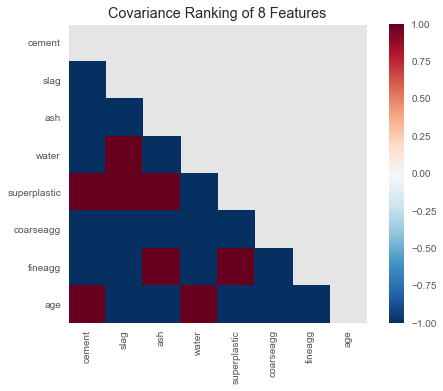

<AxesSubplot:title={'center':'Covariance Ranking of 8 Features'}>

In [28]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='covariance') 
visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof()

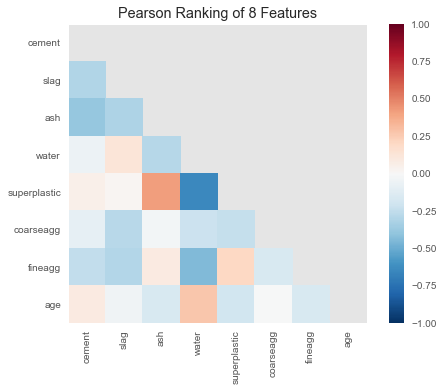

<AxesSubplot:title={'center':'Pearson Ranking of 8 Features'}>

In [29]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='pearson')
visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof()

<b> Notes </b>
1. Lowest Ranked Feature(s) (Shapiro): age, ash, slag
2. Highest Ranked Feature(s) (Shapiro): cement, water, coarseagg, fineagg
3. Lowest Ranked Feature(s) (Pearson/Covariance): water
4. Highest Ranked Feature(s) (Pearson): superplastic

# 3. Prepare the Data for Machine Learning Algorithms
<b> Tasks Executed in this section </b>
1. Data Cleaning
2. Feature Selection
3. Feature Scaling

<b> Actions </b>
1. Dropped Features: 2 (ash and slag)
2. Discretize continuous feature(s): None
2. Decompose features (e.g., categorical, date/time, etc.): None
3. Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.): None
4. Aggregate features into promising new features: None
5. Custom Transformers: Normalized predictors
6. Transformation Pipelines: None

## 3.1 Data Cleaning
<b> Tasks Executed in this section </b>
1. Handle Text & Categorical Data
2. Treat Missing Values and/or Zeros
3. Treat Outliers, Erroneous and/or Unique Values

### Treat (if necessary) -  Missing Values and/or Zeros
1. No missing data. 
2. Values of Zero "OK". 

No treatment necessary. 

### Treat (if necessary) - Erronenous and/or Unique Values and/or Outliers
1. Cannot determine "erroneous" values without SME. 
2. Outliers removed via Winsorization

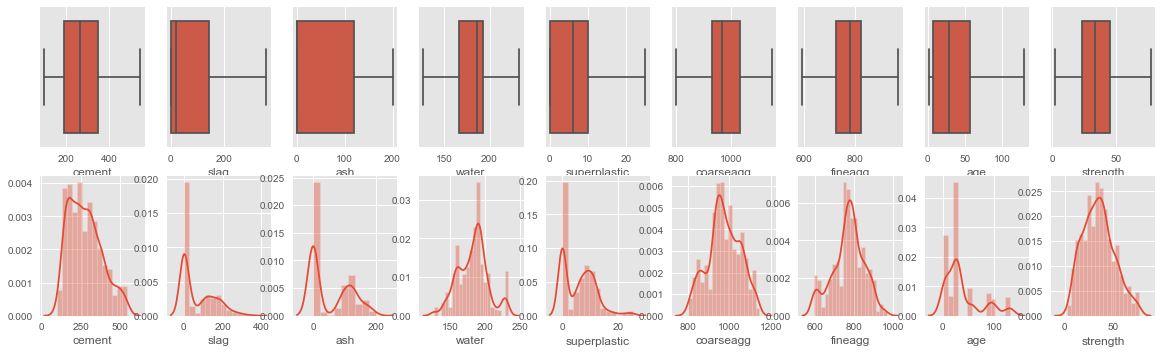

In [30]:
# remove outliers
for i in col_num:
    q1, q2, q3 = df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    df[i]=df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

# confirm outliers were removed
plt.figure(figsize=(20,15))
pos = 1

for i in col_num:
    plt.subplot(5, 9, pos)
    sns.boxplot(df[i])
    pos += 1 

for i in col_num:
    plt.subplot(5, 9, pos)
    sns.distplot(df[i])
    pos += 1 

### Data Post-Cleaning 

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,005.0000",278.6313,104.3443,102.0000,190.7000,265.0000,349.0000,540.0000
slag,"1,005.0000",72.0372,86.1500,0.0000,0.0000,20.0000,142.5000,356.2500
ash,"1,005.0000",55.5363,64.2080,0.0000,0.0000,0.0000,118.3000,200.1000
water,"1,005.0000",182.0668,21.1586,127.1500,166.6000,185.7000,192.9000,232.3500
superplastic,"1,005.0000",5.9815,5.7245,0.0000,0.0000,6.1000,10.0000,25.0000
coarseagg,"1,005.0000",974.3768,77.5797,801.0000,932.0000,968.0000,"1,031.0000","1,145.0000"
fineagg,"1,005.0000",772.5711,80.0359,594.0000,724.3000,780.0000,822.2000,969.0500
age,"1,005.0000",38.0761,35.8625,1.0000,7.0000,28.0000,56.0000,129.5000
strength,"1,005.0000",35.2263,16.2203,2.3300,23.5200,33.8000,44.8700,76.8950


In [32]:
opts5 = df.columns.values
selector5 = widgets.RadioButtons(options=opts4, description='Select Hue Attribute:', disabled=False)

output5 = widgets.Output()
display(selector5)
display(output5)

def pairplot4(widg):
    choices = widg['new']
    data = df.loc[:, choices] if choices else df
    output5.clear_output(wait=True)
    with output5:
        df['hue_bins']= pd.cut(df[selector5.value], 3)
        ax = sns.pairplot(df, hue = "hue_bins",  palette="husl")
        plt.show()
selector5.observe(pairplot4,names = 'value')

RadioButtons(description='Select Hue Attribute:', options=('cement', 'slag', 'ash', 'water', 'superplastic', '…

Output()

## 3.2 Feature Selection
Irrelevant Features? Drop Features?

<b> On sklearn.feature_selection module used below </b>
1. Implements feature selection algorithms.
2. It currently includes univariate filter selection methods and the recursive feature elimination algorithm.
3. The classes in the module can be used for feature selection/dimensionality reduction on sample set. 
4. It can be used used either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.
5. SelectKBest removes all but the  highest scoring features
6. f_regression is a linear model for testing the individual effect of each of many regressors. This a scoring function to be used in a feature selection procedure, not a free standing feature selection procedureusing two steps:1) the correlation between each regressor and the target is computed; 2) It is converted to an F score then to a p-value

From: https://scikit-learn.org/stable/modules/feature_selection

In [33]:
x1=df.drop("strength", axis=1)
y1=df["strength"]

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression
fScore,pVal = f_regression(x1,y1,center=True)

In [35]:
for col,fv,pv in zip(x1.columns,fScore,pVal):
    print(col+": fScore = "+str(round(fv,4))+", pVal = "+str(pv))

cement: fScore = 314.6866, pVal = 1.8941499403293196e-61
slag: fScore = 10.6371, pVal = 0.0011457899679291582
ash: fScore = 6.4094, pVal = 0.01150333712317469
water: fScore = 79.7414, pVal = 1.9979384624180564e-18
superplastic: fScore = 133.721, pVal = 4.024495431070619e-29
coarseagg: fScore = 21.7828, pVal = 3.4671953241697628e-06
fineagg: fScore = 36.9556, pVal = 1.715236357905689e-09
age: fScore = 294.992, pVal = 3.697889981711811e-58


<b> Notes on attributes' fScore / pVal</b>
1. cement: high(est) / high          
2. slag: low / low(est) and of lowest rank in Shapiro --> remove           
3. ash: low(est) / low  and of lowest rank in Shapiro --> remove           
4. water: mid / high           
5. superplastic: mid / high(est)    
6. coarseagg: mid / high       
7. fineagg: mid / mid         
8. age: high / high         

In [36]:
sel_feat = SelectKBest(f_regression, k=6)
sel_feat.fit(x1, y1)

SelectKBest(k=6, score_func=<function f_regression at 0x000001FFEE2B3708>)

In [37]:
sel_feat.get_support(True)

array([0, 3, 4, 5, 6, 7], dtype=int64)

In [38]:
print("the selected features are:")
df.columns[sel_feat.get_support(True)]

the selected features are:


Index(['cement', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age'], dtype='object')

## 3.3 Feature Engineering
1. Discretize continuous feature? No (SME may guide)? Not necessary
2. Decompose features (e.g., categorical, date/time, etc.)? Not necessary
3. Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.)? No (SME may guide otherwise)
4. Aggregate features into promising new features? No

## 3.4 Feature Scaling
Notes/Excerpts from Aurelien Geron's "Hands On Machine Learning with SciKit Learn, Keras, and Tensorflow - 2nd Edition": 
1. "One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales."
2. "Scaling the target values is generally notrequired."
3. "There are two common ways to get all attributes to have the same scale: *min-max scaling* and *standardization*."
4. "*Min-max scaling* (many people call this *normalization*) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1."
5. "*Standardization* is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers."
6. "As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data)."

Notes/Excerpts from Matt Harrison's "Machine Learning Pocket Reference - Working with structured data in python": 
1. Normalization wil help the performance of models that depend on a distance metric to determine similarity (not a requirement of tree models).
2. "*Standardizing* is translating the data so that it has a mean value of zero and a standard deviation of one. This way models don't treat variables with larger scales  as more important than smaller scaled variables. 

Standardize?
Normalize?

# 4. Modeling

## 4.1 Shortlist Models to Evaluate

In [39]:
#ML Models of interest
# linear regression
# random forest
# gradient boost

## 4.2 Split the Data

In [40]:
#x = df.loc[:, df.columns != 'Personal Loan']  # independent variables#$#
#y = df.loc[:, df.columns == 'Personal Loan']  # Target variable
print(df.columns)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [41]:
x2 = df.drop('strength', axis=1)
x2 = x2.drop({'ash', 'slag'}, axis=1)
y2 = df[['strength']]

print(x2.columns)
print(y2.columns)

Index(['cement', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age'], dtype='object')
Index(['strength'], dtype='object')


In [42]:
# Split X and y into training and test set in 70:30 ratio
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30, random_state=1)

## 4.3 Train & Evaluate


### Model 1 - Linear Regression

#### Baseline

In [43]:
# invoke the LinearRegression function and find the bestfit model on training data
lrm = LinearRegression()
lrm.fit(x2_train, y2_train)

LinearRegression()

In [44]:
print('Coefficient b1', lrm.coef_)
print('Intercept b0', lrm.intercept_)

Coefficient b1 [[ 0.05226142 -0.42422811  0.12067038 -0.06132448 -0.06864039  0.24055382]]
Intercept b0 [200.6578646]


In [45]:
y_pred = lrm.predict(x2_test)

In [46]:
print(x2_train.columns)

Index(['cement', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age'], dtype='object')


In [47]:
# the coefficients for each of the independent attributes
for idx, col_names in enumerate(x2_train.columns):
    print("The coefficient for {} is {}".format(col_names, lrm.coef_[0][idx]))

The coefficient for cement is 0.052261423405447045
The coefficient for water is -0.4242281143374003
The coefficient for superplastic is 0.12067038109803344
The coefficient for coarseagg is -0.06132447954949061
The coefficient for fineagg is -0.06864039080145143
The coefficient for age is 0.24055381872258494


In [48]:
# check the intercept for the model
intercept = lrm.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 200.65786459799435


In [49]:
# Return the coefficient of determination R^2 of the prediction.
lrm_score= lrm.score(x2_train, y2_train)
print(lrm_score)

0.6921039424031166


#### Model with Normalization and Cross Validation Applied

In [50]:
# normalize data via RobustScalar, model, and note difference
x_sc = pd.DataFrame(RobustScaler().fit_transform(x2))
x_sc.columns = x2.columns
x_sc.head()

,cement,water,superplastic,coarseagg,fineagg,age
0,-0.7814,0.6768,-0.6100,0.0384,-0.3218,0.0000
1,-0.6071,-1.0418,0.4700,1.1394,0.1655,-0.2857
2,-0.0948,0.0646,-0.0600,-0.1121,0.8294,0.0000
3,0.0063,1.6084,-0.6100,-0.3636,-1.1236,0.0000
4,-0.6961,0.2890,0.3000,0.8020,-0.8509,0.0000


In [51]:
import math
lrmNCV = LinearRegression()
lrmNCV_scores = cross_val_score(lrmNCV, x_sc, y2, cv=10)
lrmNCV_pred = cross_val_predict(lrmNCV, x_sc, y2, cv=10)

print(lrmNCV_scores)
print("K-fold cv score: "+str(lrmNCV_scores.mean()))
lrmNCV_score=lrmNCV_scores.mean()
#print(lrmNCV_score)

[0.59904981 0.70305415 0.7812664  0.60073215 0.6842236  0.72250551
 0.70200493 0.6223718  0.58787691 0.63765046]
K-fold cv score: 0.6640735720566904


### Model 2 - Random Forest

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
y3 = y2
rfm = RandomForestRegressor(random_state=7)
params = {"max_features": [1, 3, 6, 8],
              "max_depth":[5, 10, 20],
              "min_samples_split":[10, 25, 50, 100, 200],
              "min_samples_leaf": [10, 25, 50, 100, 200],
              "n_estimators": [10, 25, 50, 100, 200],
              "max_samples":[0.7,0.8,1.0],
              "bootstrap":[True,False]}
rcv = RandomizedSearchCV(rfm, param_distributions=params, n_iter=100,cv=10,random_state=7)
rcv.fit(x_sc, y3)

bestParams = rcv.best_params_
print(bestParams)
print("")

rfm2 = RandomForestRegressor(n_estimators=bestParams["n_estimators"],min_samples_leaf=bestParams["min_samples_leaf"],min_samples_split=bestParams["min_samples_split"],max_depth=bestParams["max_depth"],max_features=bestParams["max_features"],max_samples=bestParams["max_samples"],bootstrap=bestParams["bootstrap"],random_state=7)
rfm2_scores = cross_val_score(rfm2, x_sc, y3, cv=10)
rfm2_pred = cross_val_predict(rfm2, x_sc, y3, cv=10)

print(rfm2_scores)
print("K-fold cv score avg: "+str(rfm2_scores.mean())+" +- "+str(round(rfm2_scores.std(),2)))
rfm_score=rfm2_scores.mean()


{'n_estimators': 200, 'min_samples_split': 25, 'min_samples_leaf': 10, 'max_samples': 0.7, 'max_features': 3, 'max_depth': 10, 'bootstrap': False}

[0.79814046 0.82579895 0.87027887 0.81601931 0.79846716 0.84249257
 0.83925994 0.8021322  0.81735348 0.82878324]
K-fold cv score avg: 0.8238726185955982 +- 0.02


### Model 3 - GBoost

In [53]:
gbm = GradientBoostingRegressor(random_state=7)
params2 = {"max_features": [1, 3, 6, 8],
              "max_depth":[5, 10, 20],
              "min_samples_split": [10, 25, 50, 100, 200],
              "min_samples_leaf":[10, 25, 50, 100, 200],
              "n_estimators": [10, 25, 50, 100, 200]}
y4=y2 
rcv2 = RandomizedSearchCV(gbm, param_distributions=params2, n_iter=100,cv=10,random_state=7)
rcv2.fit(x_sc, y4)

bestParams2 = rcv2.best_params_
print(bestParams2)
print("")

gbm2 = GradientBoostingRegressor(n_estimators=bestParams2["n_estimators"],min_samples_leaf=bestParams2["min_samples_leaf"],min_samples_split=bestParams2["min_samples_split"],max_depth=bestParams2["max_depth"],max_features=bestParams2["max_features"],random_state=7)
gbm2_scores = cross_val_score(gbm2, x_sc, y4, cv=10)
gbm2_pred = cross_val_predict(gbm2, x_sc, y4, cv=10)

print(gbm2_scores)
print("K-fold cv score avg: "+str(gbm2_scores.mean())+" +- "+str(round(gbm2_scores.std(),2)))
gbm_score=gbm2_scores.mean()


{'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_features': 3, 'max_depth': 10}

[0.86230482 0.89263218 0.95386086 0.91919438 0.868405   0.93503413
 0.93240999 0.91538862 0.91147152 0.92389108]
K-fold cv score avg: 0.9114592584139156 +- 0.03


# 5. Results

In [54]:
data = {'Technique' : ['Linear Regression', "Linear Regression + Scaling + CV ", 'Random Forest + RandomSearch CV',
            'GradientBoost + RandomSearch CV'],
       'Score' : [lrm_score, lrmNCV_score, rfm_score, gbm_score] }

result = pd.DataFrame(data)

In [55]:
result

,Technique,Score
0,Linear Regression,0.6921
1,Linear Regression + Scaling + CV,0.6641
2,Random Forest + RandomSearch CV,0.8239
3,GradientBoost + RandomSearch CV,0.9115
